In [33]:
from google.colab import drive
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

import zipfile
import os

import json

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# importação dos dados

In [10]:
dir_path = "/content/drive/MyDrive/ponderada-hayashi-sem08/"

os.listdir(dir_path)

['images.zip', 'keypoints.json']

## Unzip file

In [11]:
zip_path = dir_path + "images.zip"

if(True): # alterar AQUI caso queira que zip seja extraído
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(dir_path)
      print("Arquivo ZIP descompactado com sucesso.")

Arquivo ZIP descompactado com sucesso.


In [12]:
os.listdir(dir_path)

['images.zip', 'keypoints.json', 'images']

# Análise exploratória

## Leitura dos dados

In [22]:
images_path = "/content/drive/MyDrive/ponderada-hayashi-sem08/images/*"

In [38]:
with open(dir_path + 'keypoints.json') as j:
    data = json.load(j)

categories = pd.DataFrame(data['categories'])
annotations = pd.DataFrame(data['annotations']).merge(categories[['id', 'name']], left_on='category_id', right_on='id')

print("Dados sobre anotações:\n")
print(annotations.head())

print("Dados sobre as categorias disponíveis:\n")
print(categories['name'])

Dados sobre anotações:

   image_id                  bbox  \
0         1  [123, 115, 379, 275]   
1        11  [217, 118, 305, 263]   
2        21  [100, 212, 303, 414]   
3        22   [108, 60, 320, 160]   
4        22  [228, 138, 381, 375]   

                                           keypoints  num_keypoints  \
0  [[193, 216, 1], [160, 217, 1], [174, 261, 1], ...             20   
1  [[277, 134, 1], [255, 135, 1], [272, 148, 1], ...             20   
2  [[186, 255, 1], [133, 258, 1], [136, 290, 1], ...             20   
3  [[305, 79, 1], [282, 84, 1], [310, 109, 1], [3...             20   
4  [[270, 177, 1], [243, 166, 1], [236, 207, 1], ...             20   

   category_id  id name  
0            1   1  dog  
1            1   1  dog  
2            1   1  dog  
3            1   1  dog  
4            1   1  dog  
Dados sobre as categorias disponíveis:

0      dog
1      cat
2    sheep
3    horse
4      cow
Name: name, dtype: object


Pode-se verificar que existem 5 classes possíveis, dog, cat, sheep, horse e cow

## Quantidade de imagens

In [42]:
count = 0

for path in glob(images_path):
  count += 1

print("Quantidade total de images:", count)

Quantidade total de images: 4608


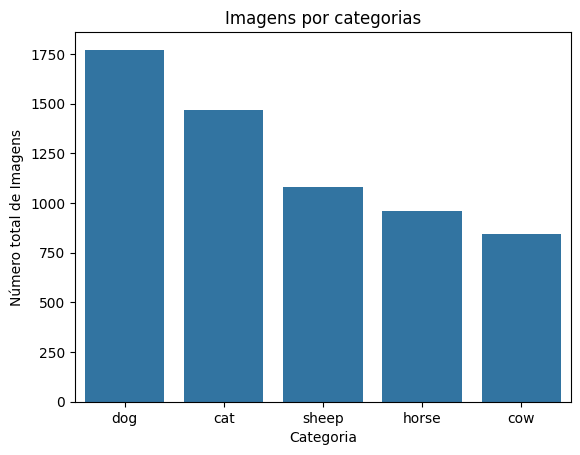

In [55]:
# Contagem de imagens por categoria
images_per_category = annotations['name'].value_counts()

# Gráfico de contagem de imagens por categoria
plt.title('Imagens por categorias')
plt.xlabel('Categoria')
plt.ylabel('Número total de Imagens')
sns.barplot(x=images_per_category.index, y=images_per_category.values)
plt.show()

In [62]:
# Número de imagens de bovinos (vacas)
num_cows = images_per_category.get('cow')
print(f"Número total de imagens de bovinos:", num_cows)
num_dogs = images_per_category.get('dog')
print(f"Número total de imagens de cachorros:", num_dogs)
num_cats = images_per_category.get('cat')
print(f"Número total de imagens de gatos:", num_cats)
num_sheeps = images_per_category.get('sheep')
print(f"Número total de imagens de ovelhas:", num_sheeps)
num_horses = images_per_category.get('horse')
print(f"Número total de imagens de cavalos:", num_horses)

Número total de imagens de bovinos: 842
Número total de imagens de cachorros: 1771
Número total de imagens de gatos: 1466
Número total de imagens de ovelhas: 1078
Número total de imagens de cavalos: 960


Assim conclui-se que, de 4608 imagens totais presentes no dataset, 842 são de bovinos(vacas), 1771 de cachorros, 1466 de gatos, 1078 de ovelhas e 960 de cavalos